## Degree - capacity relation study

In [1]:
import networkx as nx

# Open adjencency list file and build the directed graph
f=open("lightningAdjList.txt", 'rb')
G=nx.read_multiline_adjlist(f, create_using=nx.DiGraph)
f.close()

print("Number of nodes: " + str(G.number_of_nodes()))
print("Number of edges: " + str(G.number_of_edges()))

# Read alias file and create a pub_key -> alias dic

Number of nodes: 1647
Number of edges: 17016


In [2]:
edges = G.edges()
capacities = nx.get_edge_attributes(G, 'capacity')

degreeAverageWeight = {}
for n in G.nodes():
    numberEdges = 0
    sumWeights = 0
    for e in edges:
        if(n in e):
            sumWeights += capacities[e]
            numberEdges += 1
    if(numberEdges != 0):
        degreeAverageWeight[G.degree(n)] = sumWeights/numberEdges
        

In [3]:
import matplotlib.pyplot as plt


plt.figure()
plt.plot(list(degreeAverageWeight.keys()), list(degreeAverageWeight.values()), 'bo')
plt.xlabel('Node degree')
plt.ylabel('Edge capacity')
plt.title('Relation degree / edge capacity')
plt.show()


<Figure size 640x480 with 1 Axes>

From the graphs shown we can see that the degree of the node (out degree, in degree or degree, they were all tested) do not correlate assortatively or disassortatively with the capacity of each edge

## Correlation by threshold

Cut edges capacity by threshold and compute the average capacity for each degree 

60000000.0


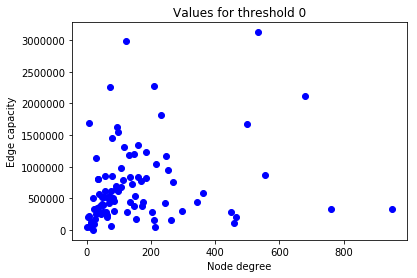

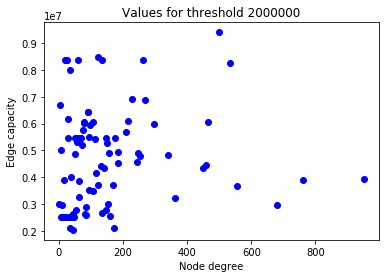

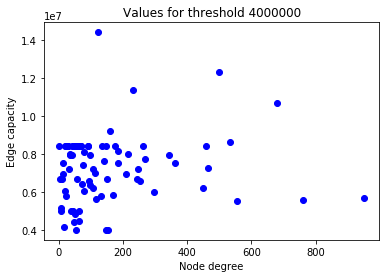

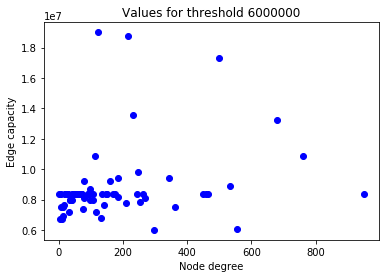

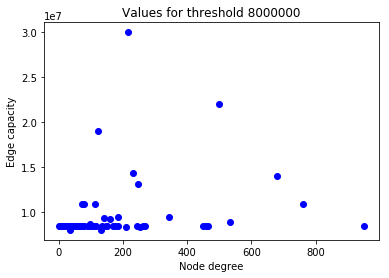

In [4]:
max_capacity = 0
for c in list(capacities.values()):
    if(c > max_capacity):
        max_capacity = c
        
print(max_capacity)
max_capacity = int(max_capacity)

for t in range(0, 10000000, 2000000):
    degreeAverageWeight = {}
    for n in G.nodes():
        numberEdges = 0
        sumWeights = 0
        for e in edges:
            if(n in e and capacities[e] >= t):
                sumWeights += capacities[e]
                numberEdges += 1
        if(numberEdges != 0):
            degreeAverageWeight[G.degree(n)] = sumWeights/numberEdges

    plt.figure()
    plt.plot(list(degreeAverageWeight.keys()), list(degreeAverageWeight.values()), 'bo')
    plt.xlabel('Node degree')
    plt.ylabel('Edge capacity')
    plt.title('Values for threshold ' + str(t))
    plt.show()

Compute the maximum capacity for each degree

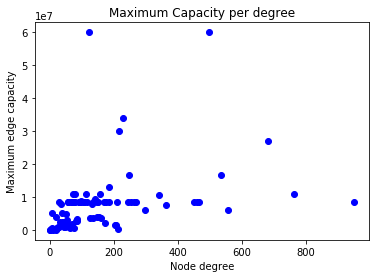

In [5]:
degreeMaximumWeight = {}
for n in G.nodes():
    maximumCapacity = 0
    for e in edges:
        if(n in e and capacities[e] > maximumCapacity):
            maximumCapacity = capacities[e]
    degreeMaximumWeight[G.degree(n)] = maximumCapacity

plt.figure()
plt.plot(list(degreeMaximumWeight.keys()), list(degreeMaximumWeight.values()), 'bo')
plt.xlabel('Node degree')
plt.ylabel('Maximum edge capacity')
plt.title('Maximum Capacity per degree')
plt.show()